In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

%matplotlib inline
warnings.filterwarnings('ignore')

1.**Problem statement**

Customer churn is a critical metric for subscription-based businesses. Predicting which customers
are likely to leave helps in taking proactive retention actions.

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

**2)read and explore the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**4)checking for unique value**

In [ ]:
for col in df.columns:
    print(col) # Indent this line
    print(df[col].unique()) # Indent this line
    print("") # Indent this line

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

In [ ]:
# List of columns you want value counts for
columns_to_count = ['PaymentMethod', 'gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'Churn']

# Loop through the specified columns and print value counts
for column in columns_to_count:
    print(f"Value counts for column: **{column}**")  # Bold column name
    print(df[column].value_counts())
    print("\n")

Value counts for column: **PaymentMethod**
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


Value counts for column: **gender**
gender
Male      3555
Female    3488
Name: count, dtype: int64


Value counts for column: **Partner**
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Value counts for column: **Dependents**
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Value counts for column: **PhoneService**
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Value counts for column: **MultipleLines**
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Value counts for column: **InternetService**
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Value counts for column: **OnlineSecurity**
OnlineSecurity
No 

**5)visulizing numerical variable**

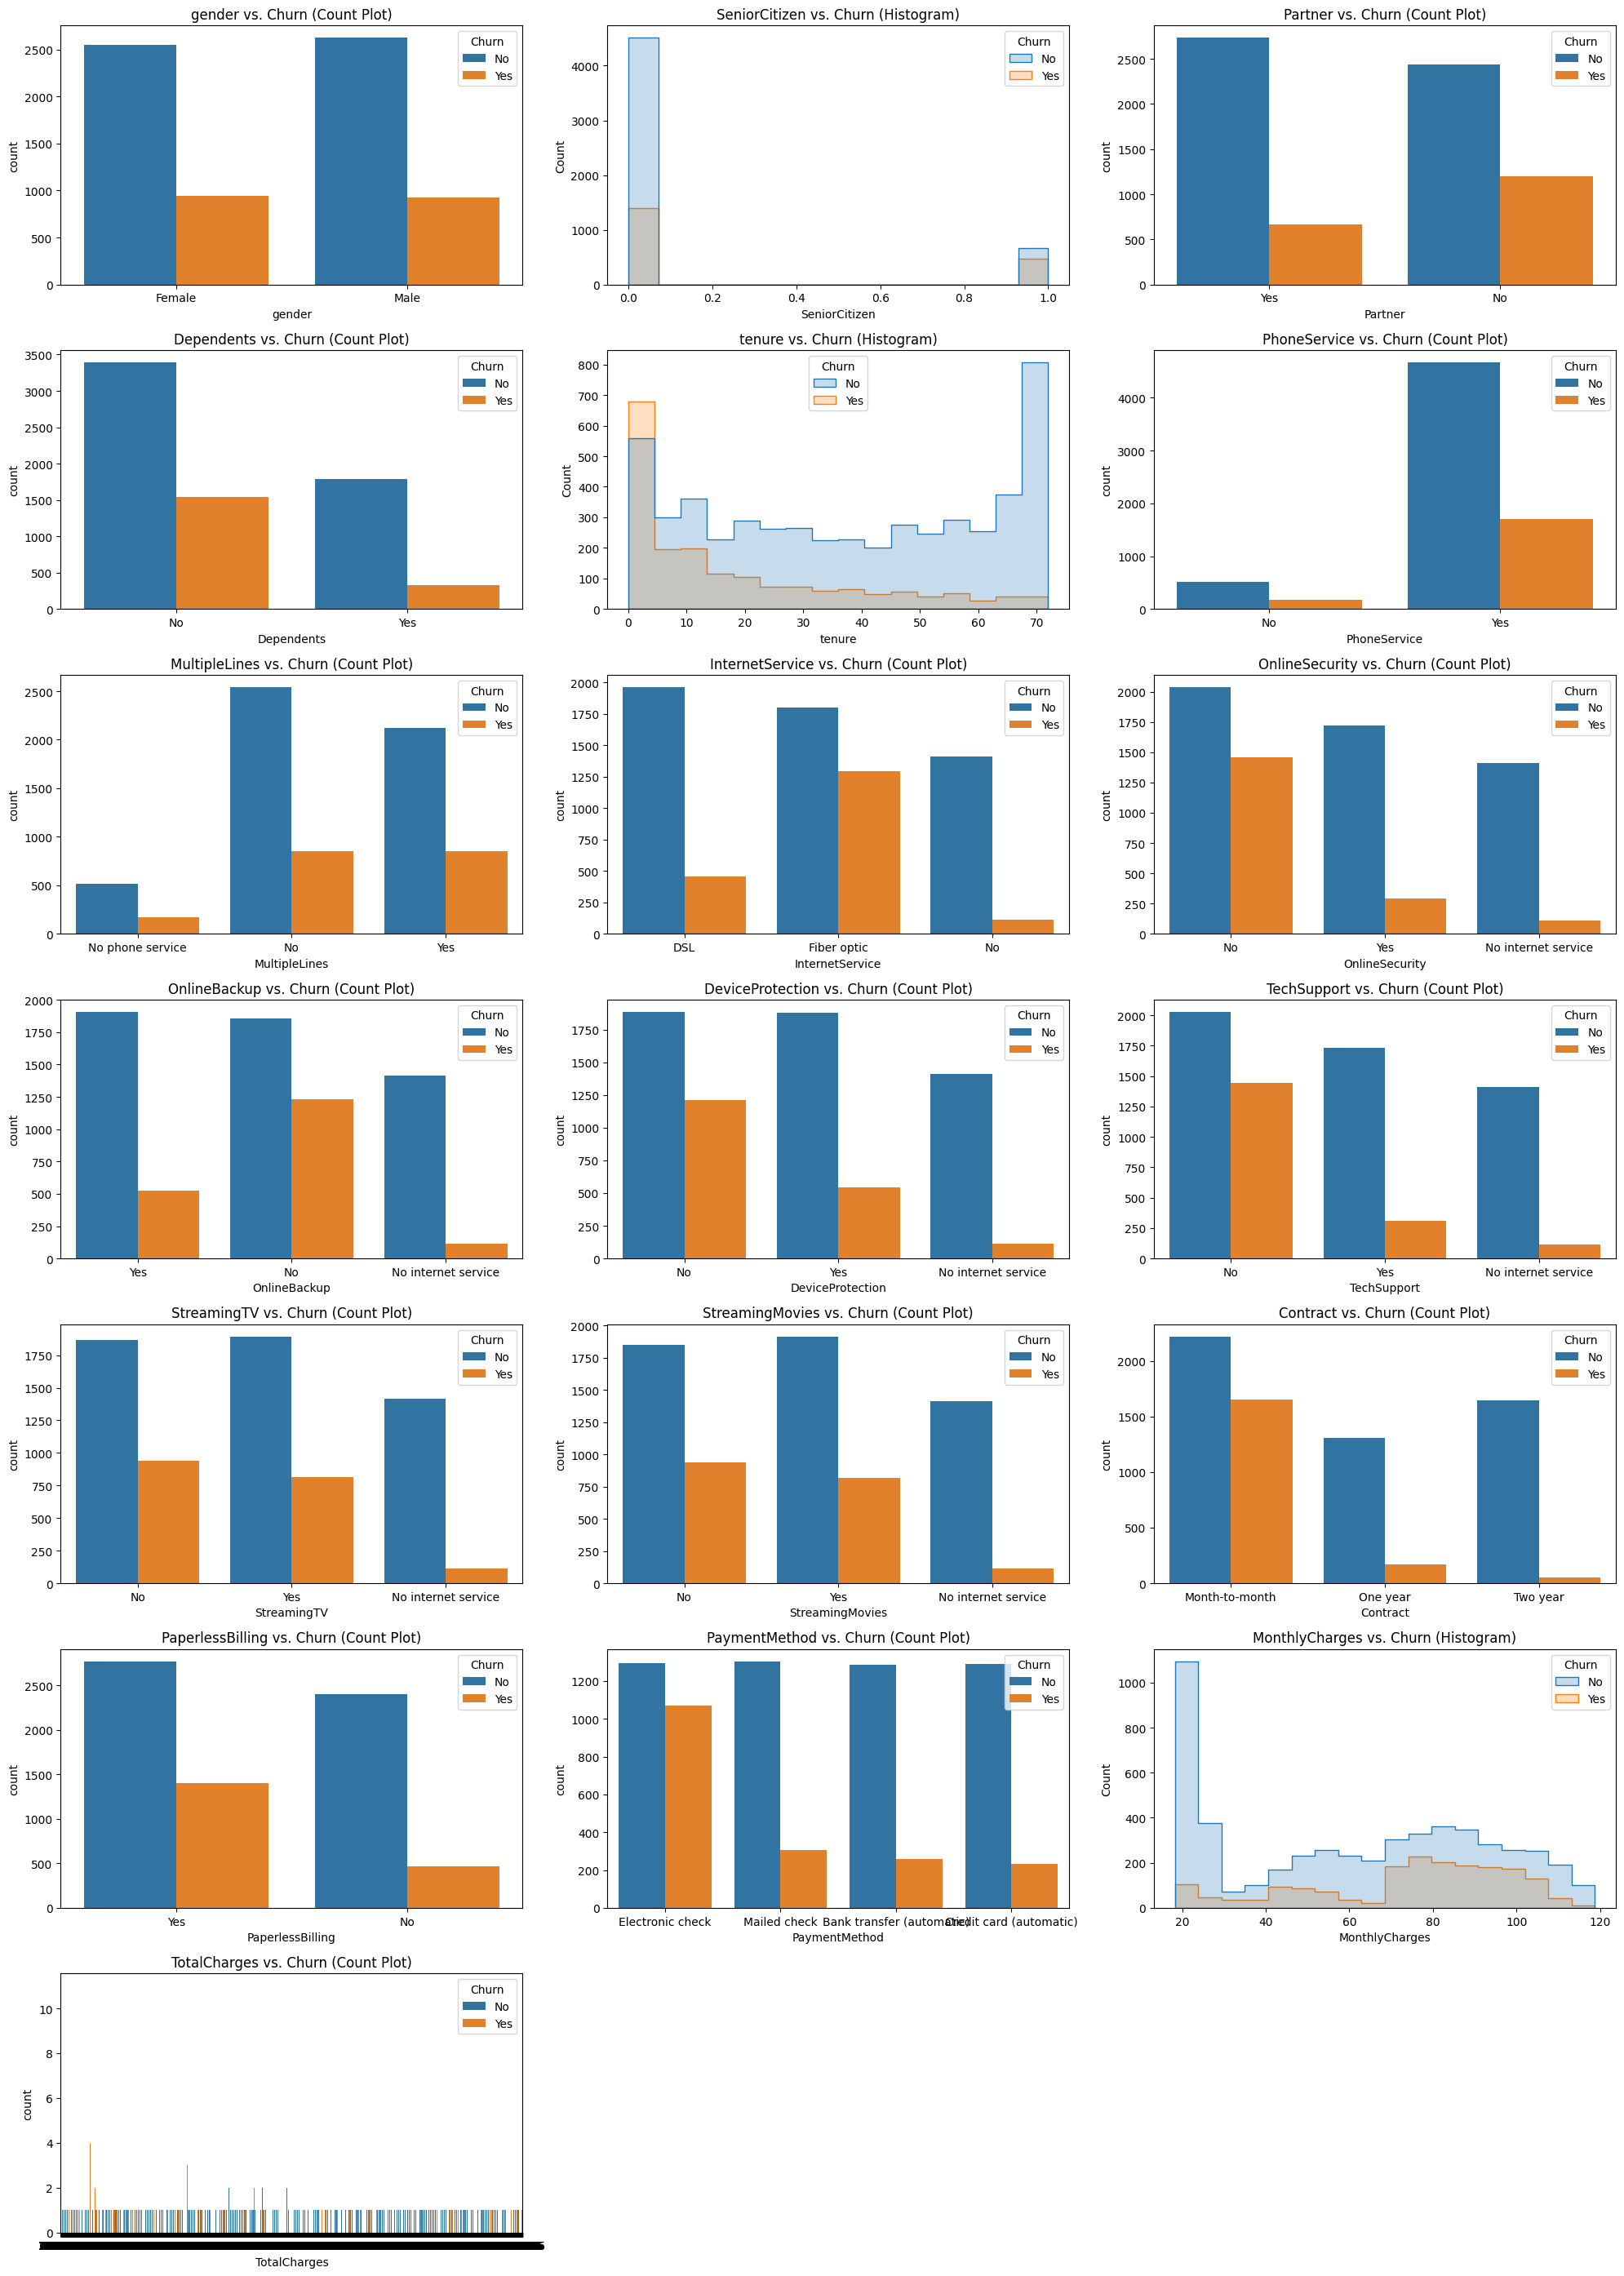

In [ ]:


# Columns to visualize against Churn
columns_to_visualize = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Calculate the number of rows and columns for subplots
num_rows = int(len(columns_to_visualize) / 3) + (len(columns_to_visualize) % 3 > 0)
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()

# Iterate through columns and create visualizations
for i, column in enumerate(columns_to_visualize):
    if df[column].dtype == 'object':  # Categorical data
        sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])  # Churn as hue
        axes[i].set_title(f'{column} vs. Churn (Count Plot)')
    else:  # Numerical data
        sns.histplot(data=df, x=column, hue='Churn', element='step', ax=axes[i])  # Churn as hue
        axes[i].set_title(f'{column} vs. Churn (Histogram)')

# Hide any unused subplots
for i in range(len(columns_to_visualize), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()  # Display the figure

**6)creating numerical and categorical feature**

In [ ]:
# Correct the column names to match the actual names in the DataFrame
numerical_features = ['tenure', 'PhoneService',  'MultipleLines', 'TotalCharges', 'MonthlyCharges']  # Example: 'Tenure' might be 'tenure' in your DataFrame
categorical_features = ['PaymentMethod', 'gender', 'Partner', 'Dependents', 'Contract']  # Example: 'PreferredPaymentMode' might be 'PaymentMethod'

# Now, try to create df_features again
df_features = df[numerical_features + categorical_features + ['Churn']]
df_features.head(10)

tenure PhoneService     MultipleLines TotalCharges  MonthlyCharges  \
0       1           No  No phone service        29.85           29.85   
1      34          Yes                No       1889.5           56.95   
2       2          Yes                No       108.15           53.85   
3      45           No  No phone service      1840.75           42.30   
4       2          Yes                No       151.65           70.70   
5       8          Yes               Yes        820.5           99.65   
6      22          Yes               Yes       1949.4           89.10   
7      10           No  No phone service        301.9           29.75   
8      28          Yes               Yes      3046.05          104.80   
9      62          Yes                No      3487.95           56.15   

               PaymentMethod  gender Partner Dependents        Contract Churn  
0           Electronic check  Female     Yes         No  Month-to-month    No  
1               Mailed check    Male      No         No        One year    No  
2               Mailed check    Male      No         No  Month-to-month   Yes  
3  Bank transfer (automatic)    Male      No         No        One year    No  
4           Electronic check  Female      No         No  Month-to-month   Yes  
5           Electronic check  Female      No         No  Month-to-month   Yes  
6    Credit card (automatic)    Male      No        Yes  Month-to-month    No  
7               Mailed check  Female      No         No  Month-to-month    No  
8           Electronic check  Female     Yes         No  Month-to-month   Yes  
9  Bank transfer (automatic)    Male      No        Yes        One year    No

**7)create feature from the data**

In [ ]:
def train_test_split_and_features(df_features):
    x = df_features.drop('Churn', axis=1)  # axis=1 to drop a column
    x = pd.get_dummies(x, dtype=int)       # One-hot encoding for categorical features
    y = df_features['Churn']             # Target variable
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features

x_train, x_test, y_train, y_test, features = train_test_split_and_features(df)  # Now df is defined

   SeniorCitizen  tenure  MonthlyCharges  customerID_0002-ORFBO  \
0              0       1           29.85                      0   
1              0      34           56.95                      0   
2              0       2           53.85                      0   
3              0      45           42.30                      0   
4              0       2           70.70                      0   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                      0                      0                      0  .

In [ ]:
x_train.head(10)

SeniorCitizen  tenure  MonthlyCharges  customerID_0002-ORFBO  \
2920              0      72           85.10                      0   
2966              1      14           46.35                      0   
6099              0      71           24.70                      0   
5482              0      33           73.90                      0   
2012              0      47           98.75                      0   
156               0      22           84.15                      0   
6562              1      14          100.20                      0   
1495              0      52           98.15                      0   
939               0      15           19.90                      0   
3631              1       1           49.55                      0   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
2920                      0                      0                      0   
2966                      0                      0                      0   
6099                      0                      0                      0   
5482                      0                      0                      0   
2012                      0                      0                      0   
156                       0                      0                      0   
6562                      0                      0                      0   
1495                      0                      0                      0   
939                       0                      0                      0   
3631                      0                      0                      0   

      customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
2920                      0                      0                      0   
2966                      0                      0                      0   
6099                      0                      0                      0   
5482                      0                      0                      0   
2012                      0                      0                      0   
156                       0                      0                      0   
6562                      0                      0                      0   
1495                      0                      0                      0   
939                       0                      0                      0   
3631                      0                      0                      0   

      ...  TotalCharges_995.35  TotalCharges_996.45  TotalCharges_996.85  \
2920  ...                    0                    0                    0   
2966  ...                    0                    0                    0   
6099  ...                    0                    0                    0   
5482  ...                    0                    0                    0   
2012  ...                    0                    0                    0   
156   ...                    0                    0                    0   
6562  ...                    0                    0                    0   
1495  ...                    0                    0                    0   
939   ...                    0                    0                    0   
3631  ...                    0                    0                    0   

      TotalCharges_996.95  TotalCharges_997.65  TotalCharges_997.75  \
2920                    0                    0                    0   
2966                    0                    0                    0   
6099                    0                    0                    0   
5482                    0                    0                    0   
2012                    0                    0                    0   
156                     0                    0                    0   
6562                    0                    0                    0   
1495                    0                    0                    0   
939                     0                    0                 

**8)fit and evaluate model**

In [ ]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_samples=0.8, min_samples_split=2, max_depth=None, max_features='sqrt'):
    """
    Fits a RandomForestClassifier model and evaluates its performance.

    Args:
        x_train: Training data features.
        x_test: Testing data features.
        y_train: Training data target.
        y_test: Testing data target.
        max_samples: The number of samples to draw from X to train each base estimator.
        min_samples_split: The minimum number of samples required to split an internal node.
        max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
                        or until all leaves contain less than min_samples_split samples.
        max_features: The number of features to consider when looking for the best split:
                        - If int, then consider max_features features at each split.
                        - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
                        - If “auto”, then max_features=sqrt(n_features).
                        - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
                        - If “log2”, then max_features=log2(n_features).
                        - If None, then max_features=n_features.

    Returns:
        The trained RandomForestClassifier model.
    """
    random_forest = RandomForestClassifier(
        random_state=0,
        max_samples=max_samples,
        min_samples_split=min_samples_split,
        max_depth=max_depth,  # Pass max_depth to RandomForestClassifier
        max_features=max_features # Pass max_features to RandomForestClassifier
    )
    model = random_forest.fit(x_train, y_train)
    random_forest_predict = model.predict(x_test)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)

    print("Confusion Matrix:")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy Of Random Forest:", random_forest_acc_score)
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, random_forest_predict))  # Pass both y_test and predictions

    return model

In [ ]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

Confusion Matrix:
[[948  93]
 [217 151]]


Accuracy Of Random Forest: 0.7799858055358411


Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1041
         Yes       0.62      0.41      0.49       368

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



**9)try diffrent parameter to identify best one**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Assuming 'model' and 'param_grid' are defined elsewhere
# Assuming 'y_train' and 'x_train' are defined elsewhere
# Defining param_grid here to ensure it's available
param_grid = {
    'max_depth': [7, 10],  # Reduced to 2 values
    'max_features': [0.8, 0.9],  # Reduced to 2 values
    'max_samples': [0.8, 0.9]  # Reduced to 2 values
}

search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=2)  # Added cv=2
search.fit(x_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .....max_depth=7, max_features=0.8, max_samples=0.8; total time=  16.4s
[CV] END .....max_depth=7, max_features=0.8, max_samples=0.8; total time=  15.5s
[CV] END .....max_depth=7, max_features=0.8, max_samples=0.9; total time=  16.5s
[CV] END .....max_depth=7, max_features=0.8, max_samples=0.9; total time=  17.4s
[CV] END .....max_depth=7, max_features=0.9, max_samples=0.8; total time=  16.0s
[CV] END .....max_depth=7, max_features=0.9, max_samples=0.8; total time=  15.9s
[CV] END .....max_depth=7, max_features=0.9, max_samples=0.9; total time=  18.1s
[CV] END .....max_depth=7, max_features=0.9, max_samples=0.9; total time=  16.9s
[CV] END ....max_depth=10, max_features=0.8, max_samples=0.8; total time=  18.4s
[CV] END ....max_depth=10, max_features=0.8, max_samples=0.8; total time=  17.9s
[CV] END ....max_depth=10, max_features=0.8, max_samples=0.9; total time=  21.1s
[CV] END ....max_depth=10, max_features=0.8, max_

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_samples=0.8, random_state=0),
             param_grid={'max_depth': [7, 10], 'max_features': [0.8, 0.9],
                         'max_samples': [0.8, 0.9]},
             verbose=2)

In [ ]:
results = pd.DataFrame(search.cv_results_)
results = pd.DataFrame(search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
results.head(10)
#False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.673119      0.459172         0.279183        0.003190   
7      20.509936      0.297032         0.345464        0.067674   
6      18.773663      0.631953         0.278584        0.000078   
2      15.673178      0.060858         0.279183        0.002259   
3      17.213835      0.602049         0.270799        0.002743   
1      16.683368      0.416703         0.273908        0.006924   
4      17.854373      0.198014         0.334107        0.056719   
5      19.728788      1.105202         0.283584        0.003983   

   param_max_depth  param_max_features  param_max_samples  \
0                7                 0.8                0.8   
7               10                 0.9                0.9   
6               10                 0.9                0.8   
2                7                 0.9                0.8   
3                7                 0.9                0.9   
1                7                 0.8                0.9   
4               10                 0.8                0.8   
5               10                 0.8                0.9   

                                              params  split0_test_score  \
0  {'max_depth': 7, 'max_features': 0.8, 'max_sam...           0.805822   
7  {'max_depth': 10, 'max_features': 0.9, 'max_sa...           0.802982   
6  {'max_depth': 10, 'max_features': 0.9, 'max_sa...           0.804047   
2  {'max_depth': 7, 'max_features': 0.9, 'max_sam...           0.803337   
3  {'max_depth': 7, 'max_features': 0.9, 'max_sam...           0.803692   
1  {'max_depth': 7, 'max_features': 0.8, 'max_sam...           0.802272   
4  {'max_depth': 10, 'max_features': 0.8, 'max_sa...           0.799077   
5  {'max_depth': 10, 'max_features': 0.8, 'max_sa...           0.798367   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.804757         0.805289        0.000532                1  
7           0.802272         0.802627        0.000355                2  
6           0.800852         0.802449        0.001597                3  
2           0.801562         0.802449        0.000887                3  
3           0.799787         0.801739        0.001952                5  
1           0.800497         0.801384        0.000887                6  
4           0.803337         0.801207        0.002130                7  
5           0.799787         0.799077        0.000710                8

In [ ]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index=False)

In [ ]:
search. best_params_


{'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.8}

**10)evaluate the model with best parameter**

In [ ]:
model_5 = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10, min_samples_split=0.01, max_features=0.7, max_samples=0.1)

Confusion Matrix:
[[950  91]
 [203 165]]


Accuracy Of Random Forest: 0.7913413768630234


Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1041
         Yes       0.64      0.45      0.53       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
importances = pd.DataFrame(model.feature_importances_)
importances['feature'] = features
importances.columns = ['importance', 'feature']
importances.sort_values('importance', ascending=True, inplace=True)
print(importances) # Print the importance to analyze




      importance                         feature
1849    0.000000           customerID_2680-XKKNJ
9245    0.000000               TotalCharges_25.8
9244    0.000000              TotalCharges_25.75
9233    0.000000             TotalCharges_2499.3
6362    0.000000           customerID_8999-XXGNS
...          ...                             ...
7060    0.018302               OnlineSecurity_No
7085    0.021790  PaymentMethod_Electronic check
7078    0.034215         Contract_Month-to-month
2       0.053166                  MonthlyCharges
1       0.074614                          tenure

[13618 rows x 2 columns]


**output and input by code**

In [ ]:
import pandas as pd

def predict_churn_from_input():
    """Gets input values from the user and predicts churn."""

    # Get input values (you'll need to add appropriate prompts for the user)
    tenure = int(input("Enter tenure (months): "))
    phone_service = input("Enter phone service (Yes/No): ")
    monthly_charges = float(input("Enter monthly charges: "))
    total_charges = float(input("Enter total charges: "))
    contract = input("Enter contract type (Month-to-month/One year/Two year): ")
    payment_method = input("Enter payment method (Bank transfer/Credit card/Electronic check/Mailed check): ")
    gender = input("Enter gender (Male/Female): ")
    partner = input("Enter partner status (Yes/No): ")
    dependents = input("Enter dependents status (Yes/No): ")

    # Create input DataFrame
    input_data = pd.DataFrame({
        'tenure': [tenure],
        'PhoneService': [phone_service],
        'MonthlyCharges': [monthly_charges],
        'TotalCharges': [total_charges],
        'Contract': [contract],
        'PaymentMethod': [payment_method],
        'gender': [gender],
        'Partner': [partner],
        'Dependents': [dependents]
    })

    # Preprocess input data (one-hot encoding)
    input_data = pd.get_dummies(input_data,
                                columns=['Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents'],
                                dtype=int)

    # Align columns with model's features (add missing columns with 0)
    input_data = input_data.reindex(columns=model.feature_names_in_, fill_value=0)

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Print prediction
    if prediction == 1:
        print("Prediction: Churn")
    else:
        print("Prediction: No Churn")

# Call the function to start the prediction process
predict_churn_from_input()

Enter tenure (months): 300
Enter phone service (Yes/No): yes
Enter monthly charges: 700
Enter total charges: 800
Enter contract type (Month-to-month/One year/Two year): one year
Enter payment method (Bank transfer/Credit card/Electronic check/Mailed check): mailed chech
Enter gender (Male/Female): mLE
Enter partner status (Yes/No): YES
Enter dependents status (Yes/No): YES
Prediction: No Churn


In [ ]:
importances = pd.DataFrame(model.feature_importances_)
importances['feature'] = features
importances.columns = ['importance', 'feature']
importances.sort_values('importance', ascending=True, inplace=True)
print(importances) # Print the importance to analyze

       importance                         feature
2177     0.000000           customerID_3108-PCCGG
12617    0.000000             TotalCharges_702.05
10049    0.000000             TotalCharges_3419.3
5403     0.000000           customerID_7609-YBPXG
5416     0.000000           customerID_7623-TRNQN
...           ...                             ...
7060     0.018302               OnlineSecurity_No
7085     0.021790  PaymentMethod_Electronic check
7078     0.034215         Contract_Month-to-month
2        0.053166                  MonthlyCharges
1        0.074614                          tenure

[13618 rows x 2 columns]


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


# **Input and output in gradio**

In [ ]:
import gradio as gr
import joblib
import pandas as pd

# ... (other imports)

# 1. Save the trained model (assuming 'model' is already trained)
joblib.dump(model, 'trained_churn_model.joblib')

# 2. Load the trained model
model = joblib.load('trained_churn_model.joblib')  # Replace with your model file name

def predict_churn(tenure, PhoneService, MonthlyCharges, TotalCharges, Contract, PaymentMethod, gender, Partner, Dependents):
    input_data = pd.DataFrame([[tenure, PhoneService, MonthlyCharges, TotalCharges, Contract, PaymentMethod, gender, Partner, Dependents]],
                                columns=['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents'])

    # Preprocessing: If you did one-hot encoding during training, you need to do it here as well.
    input_data = pd.get_dummies(input_data, columns=['Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents'], dtype=int)  # Adjust columns as needed

    # Align input data columns with the model's expected columns:
    input_data = input_data.reindex(columns=model.feature_names_in_, fill_value=0)  # Fill missing columns with 0

    prediction = model.predict(input_data)[0]
    return "Churn Prediction: " + str(prediction)
# 3. Create the Gradio interface
iface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Slider(0, 100, label="Tenure (Months)"),
        gr.Radio(["Yes", "No"], label="Phone Service"),
        gr.Number(label="Monthly Charges ($)"),
        gr.Number(label="Total Charges ($)"),
        gr.Dropdown(["Month-to-month", "One year", "Two year"], label="Contract Type"),
        gr.Dropdown(["Bank transfer (automatic)", "Credit card (automatic)", "Electronic check", "Mailed check"],
                    label="Payment Method"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Radio(["Yes", "No"], label="Partner"),
        gr.Radio(["Yes", "No"], label="Dependents")
    ],
    outputs="text"  # Output will be a text string
)

# 4. Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://722feb6d800b03e6b5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
